In [57]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%pip install scikit-learn
%pip install statsmodels
# importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
#### Funciones auxiliares ######
def porcentaje_nulos(dataframe):
    # Calcula el porcentaje de valores nulos en cada columna
    porcentaje_nas = (dataframe.isnull().mean() * 100).round(2)

    # Convierte la información a un diccionario
    dict_nulos = porcentaje_nas.to_dict()

    return dict_nulos

def eliminar_columnas_con_nulos(df, umbral=0.15):

    # Calcula el porcentaje de valores nulos por columna
    porcentaje_nulos = df.isnull().mean()

    # Filtra las columnas que tienen menos del umbral de valores nulos
    columnas_a_mantener = porcentaje_nulos[porcentaje_nulos <= (1 - umbral)].index

    # Crea un nuevo DataFrame con las columnas seleccionadas
    df_resultante = df[columnas_a_mantener].copy()

    return df_resultante

# EDA

In [59]:
titanic_gender_df = pd.read_csv('Titanic/gender_submission.csv')
titanic_Test_df = pd.read_csv('Titanic/test.csv')
titanic_Train_df = pd.read_csv('Titanic/train.csv')
titanic_df= pd.concat([titanic_Train_df, titanic_Test_df], axis=0, ignore_index=True)
titanic_df.to_csv('Titanic/titanic_df.csv', index=False)
titanic_df.shape

(1309, 12)

In [60]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [61]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [62]:
titanic_df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [63]:
titanic_df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [64]:
titanic_df.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


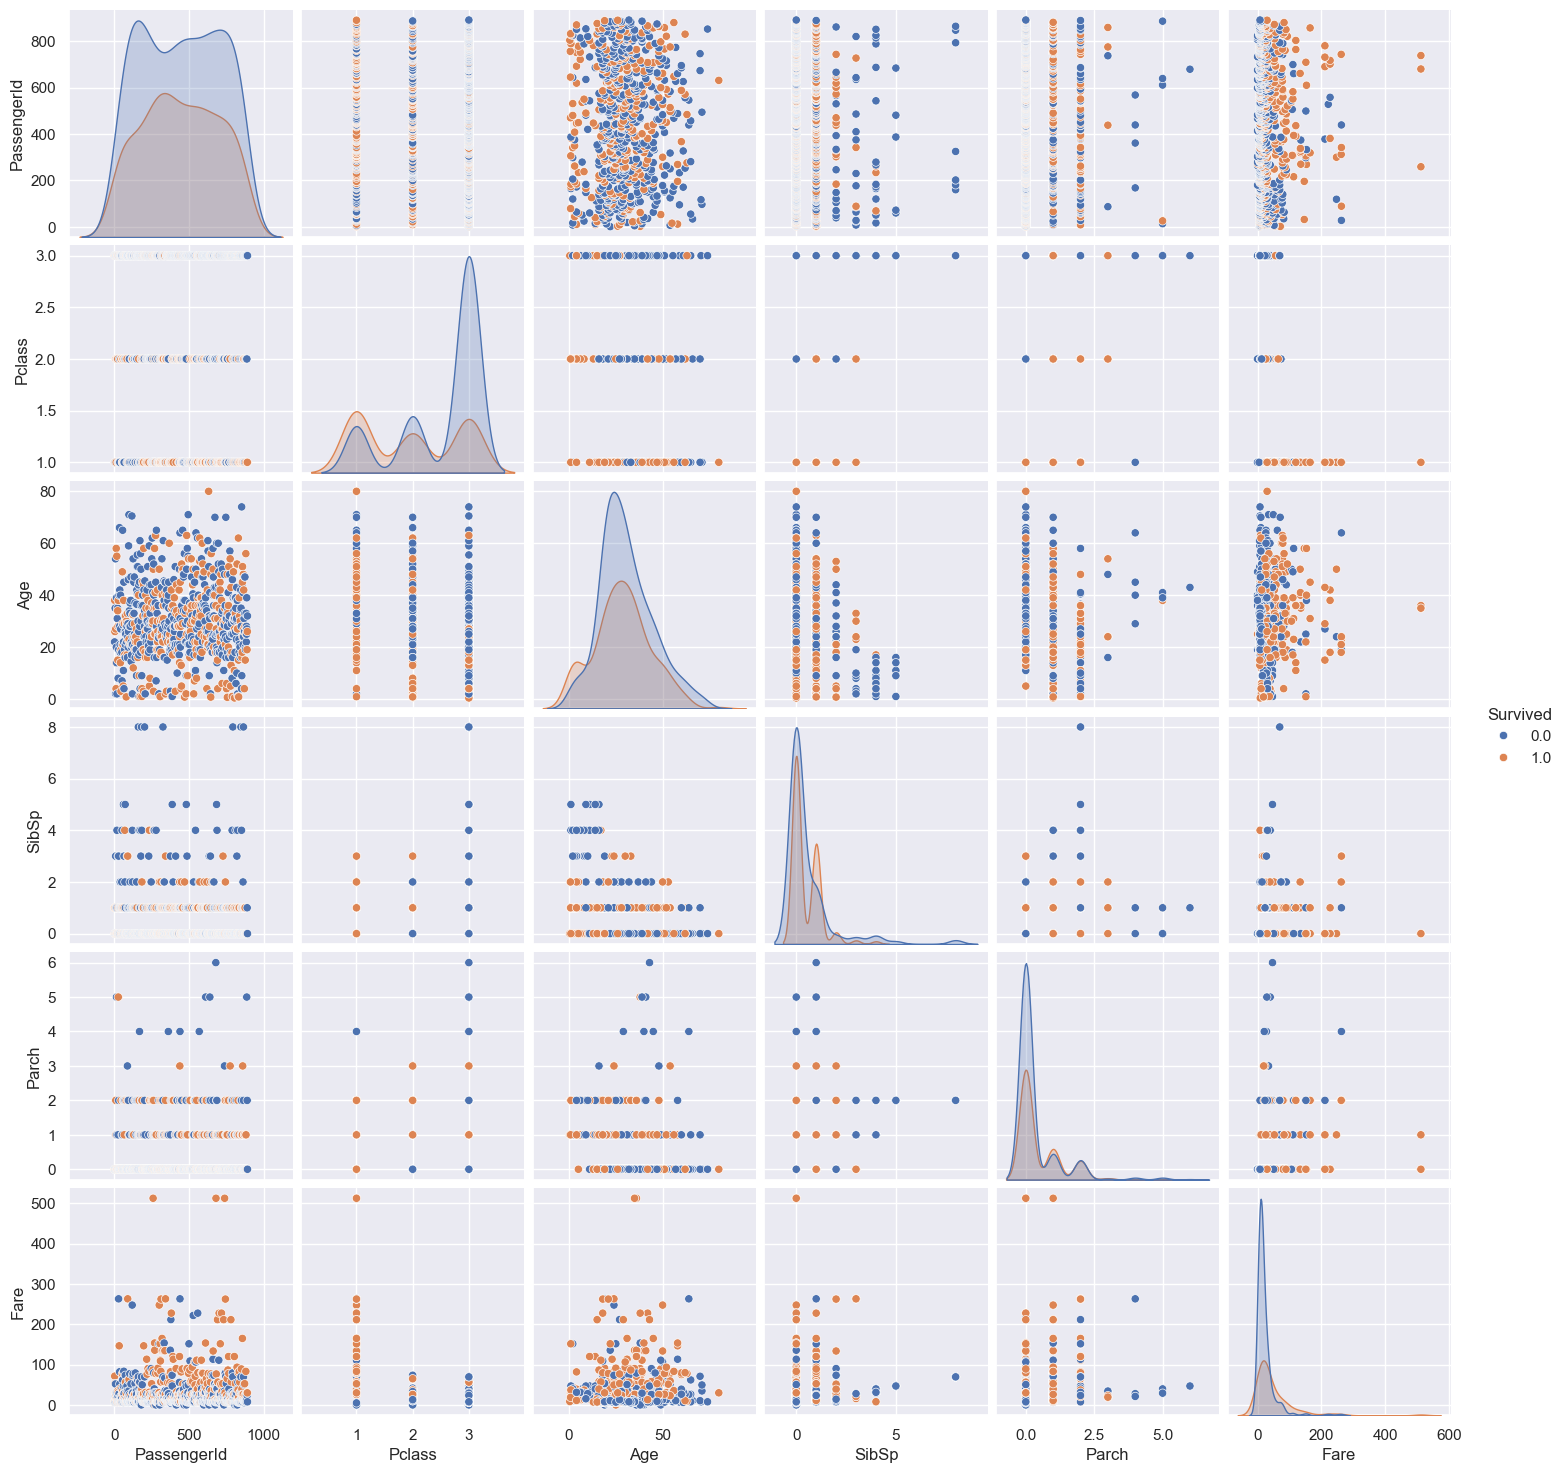

In [65]:
sns.pairplot(data=titanic_df, hue="Survived")

In [66]:
porcentaje_nulos(titanic_df)

{'PassengerId': 0.0,
 'Survived': 31.93,
 'Pclass': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 20.09,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Ticket': 0.0,
 'Fare': 0.08,
 'Cabin': 77.46,
 'Embarked': 0.15}

In [67]:
titanic_df.loc[titanic_df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [68]:
titanic_df.Survived.value_counts(normalize=True) * 100 # 0 not Survived, 1 Survived

Survived
0.0    61.616162
1.0    38.383838
Name: proportion, dtype: float64

## Paso 1: Manejo de valores faltantes

In [69]:
titanic_df = titanic_df.replace('Select', np.nan)

In [70]:
porcentaje_nulos(titanic_df)

{'PassengerId': 0.0,
 'Survived': 31.93,
 'Pclass': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 20.09,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Ticket': 0.0,
 'Fare': 0.08,
 'Cabin': 77.46,
 'Embarked': 0.15}

In [71]:
titanic_df['Survived'].value_counts()#No me la puedo borrar porque es mi objetivo a predecir

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [72]:
titanic_df['Age'].value_counts() #Dejo la edad ya veremos como rellenamos el 20% de datos nulos. seguramente usaremos la media de la edad

Age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
25.00    34
28.00    32
36.00    31
27.00    30
26.00    30
29.00    30
19.00    29
23.00    26
32.00    24
31.00    23
35.00    23
20.00    23
45.00    21
33.00    21
39.00    20
17.00    20
16.00    19
40.00    18
42.00    18
34.00    16
50.00    15
47.00    14
48.00    14
38.00    14
2.00     12
41.00    11
54.00    10
4.00     10
1.00     10
9.00     10
44.00    10
43.00     9
37.00     9
49.00     9
51.00     8
55.00     8
14.00     8
60.00     7
3.00      7
58.00     6
46.00     6
52.00     6
6.00      6
15.00     6
8.00      6
57.00     5
64.00     5
13.00     5
61.00     5
62.00     5
5.00      5
7.00      4
11.00     4
32.50     4
63.00     4
53.00     4
56.00     4
10.00     4
59.00     3
28.50     3
65.00     3
18.50     3
12.00     3
0.83      3
0.75      3
40.50     3
30.50     2
45.50     2
71.00     2
14.50     2
34.50     2
70.00     2
36.50     2
0.92      2
66.00     1
70.50     1
55.50     1
20.50     1


In [73]:
titanic_df['Fare'].value_counts() #Lo dejo hay muy pocos nulos y es un dato importante y lo dejo como esta

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
12.7375     1
45.5000     1
7.5750      1
7.5792      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [74]:
titanic_df['Cabin'].value_counts() #Lo elimino muchos nulos y no es un dato importante

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64

In [75]:
titanic_df = titanic_df.drop(columns=['Cabin'], axis=1) #Elimino la columna Cabin

In [76]:
titanic_df.shape

(1309, 11)

In [77]:
titanic_df['Embarked'].value_counts() #Lo dejo hay muy pocos nulos

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Lo que voy a hacer con survived es que solo usare para entrenar aquellas filas que tengan valores y usare el restante para hacer el test ya que mas o menos puedo hacer un 70% de train y un 30% de test

In [78]:
#Relleno los valores nulos de la columna Age con la mediana
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
#Relleno los valores nulos de la columna Age con la mediana
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())


In [79]:
#Relleno los valores nulos de la columna Age con la moda
embarked_mode = titanic_df['Embarked'].mode()[0]
embarked_mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(embarked_mode)

In [80]:
porcentaje_nulos(titanic_df)

{'PassengerId': 0.0,
 'Survived': 31.93,
 'Pclass': 0.0,
 'Name': 0.0,
 'Sex': 0.0,
 'Age': 0.0,
 'SibSp': 0.0,
 'Parch': 0.0,
 'Ticket': 0.0,
 'Fare': 0.0,
 'Embarked': 0.0}

## Paso 2: Estudio de variables monocategóricas

In [81]:
titanic_df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Embarked          3
dtype: int64

## Paso 3: estudio de variables que nos quedaron (estudio de outliers, ingeniería de características)

In [82]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

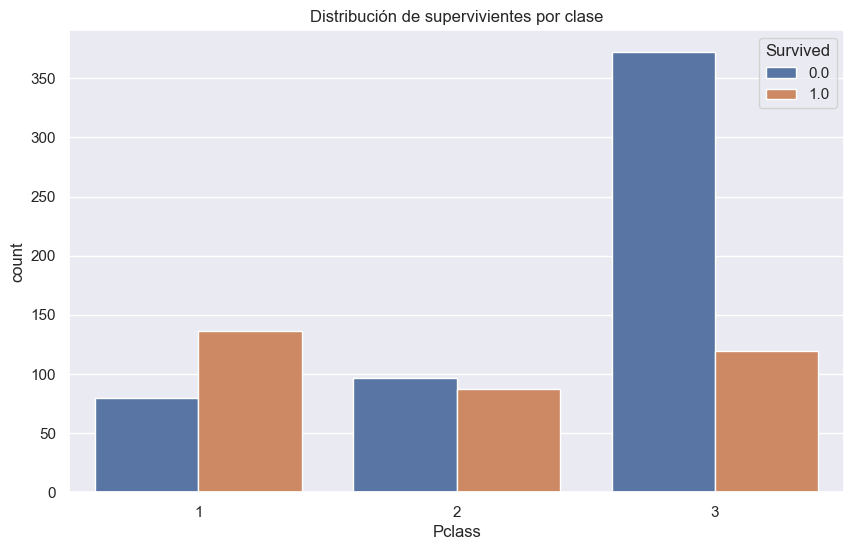

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "Pclass", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por clase")
plt.show()

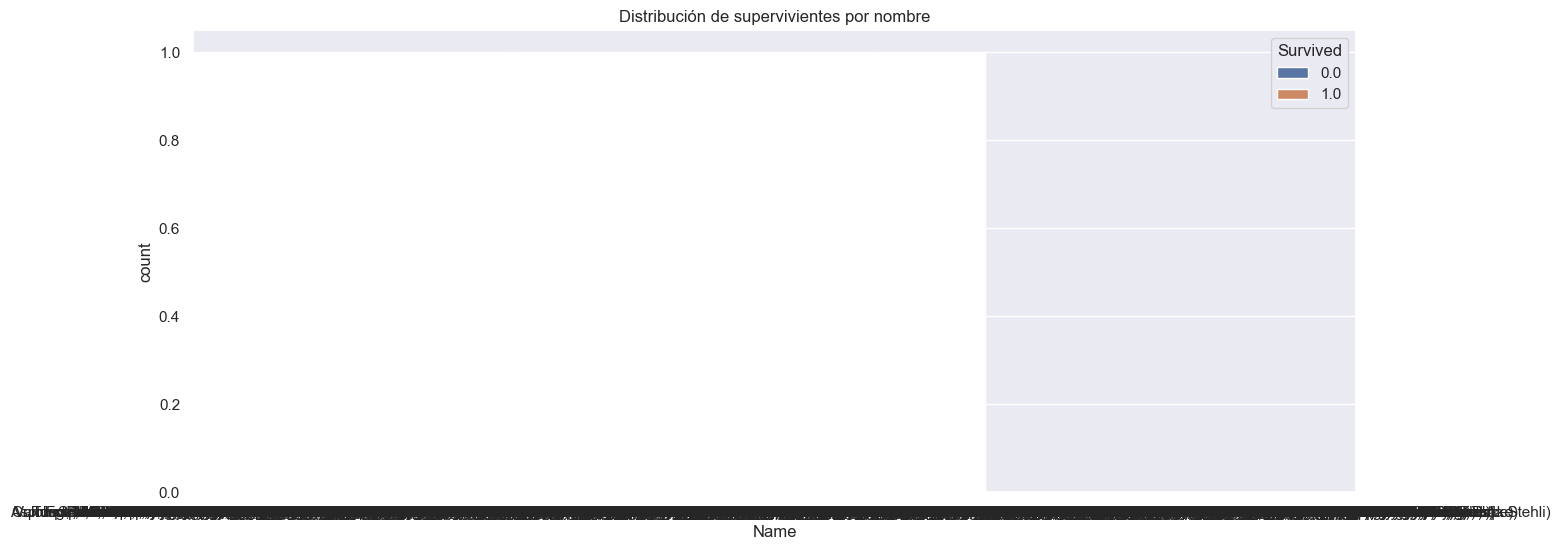

In [84]:
plt.figure(figsize=(15, 6))
sns.countplot(x = "Name", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por nombre")
plt.show()

In [85]:
titanic_df['Name'].value_counts() #no es un dato importante y no coincide casi ninguno, lo elimino
titanic_df = titanic_df.drop(columns=['Name'], axis=1) #Elimino la columna Name
titanic_df.shape

(1309, 10)

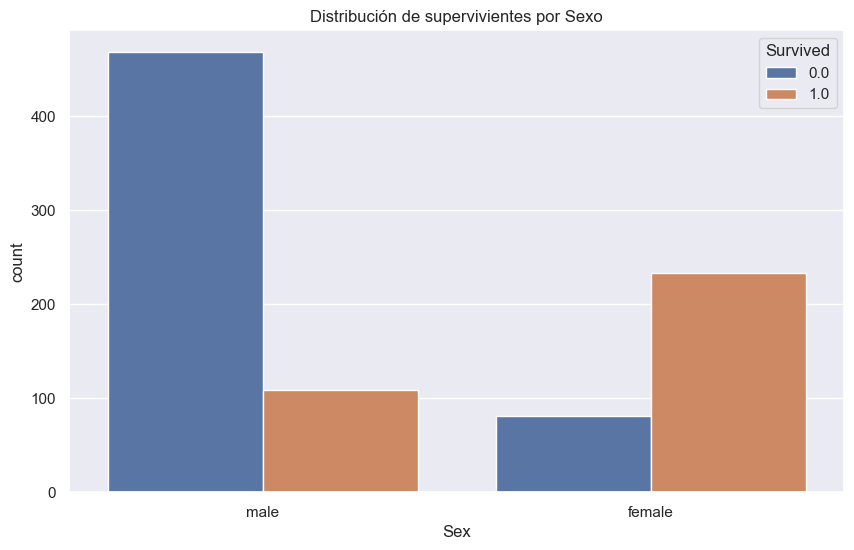

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x = "Sex", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Sexo")
plt.show()

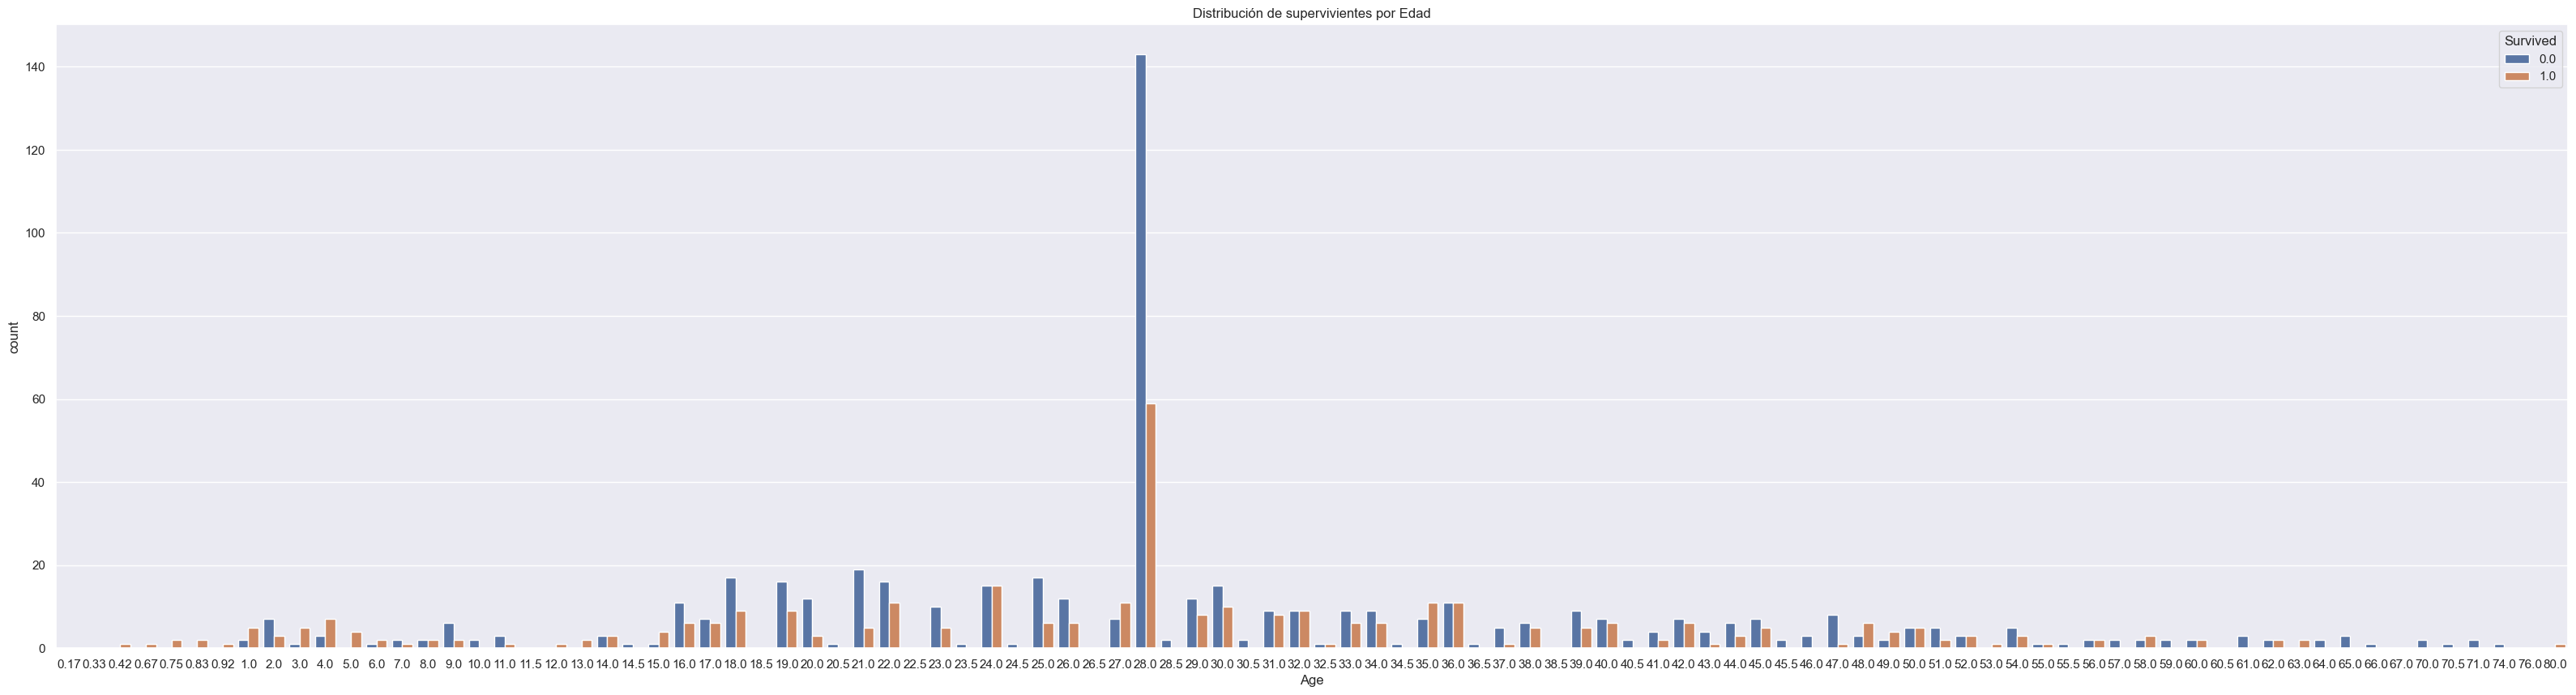

In [87]:
plt.figure(figsize=(40, 10))
sns.countplot(x = "Age", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

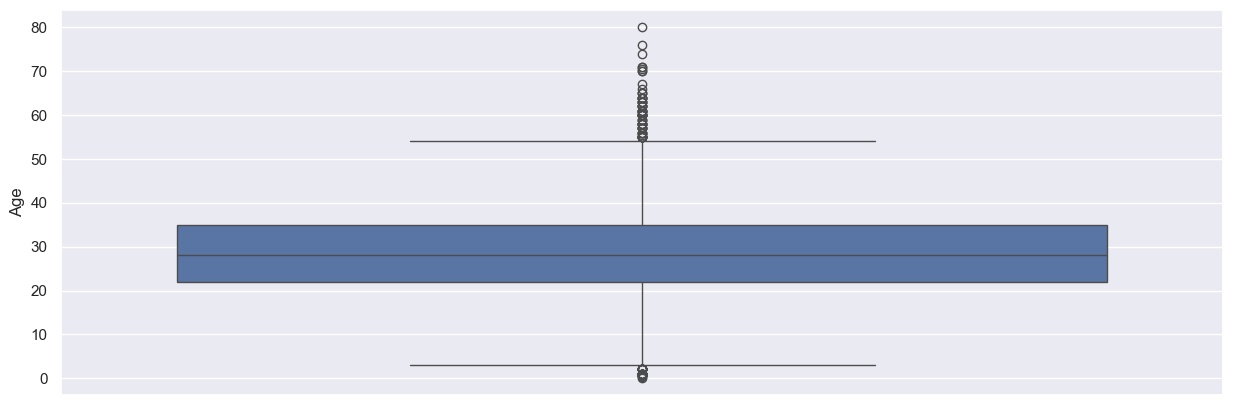

In [88]:
plt.figure(figsize=(15,5))
sns.boxplot(titanic_df['Age'])
plt.show()

In [89]:
#Voy a meter las edades en grupos de edad para que sea mas facil de analizar y para que se entienda mejor por la IA y sea un dato más útil
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Senior', 'Elderly']
titanic_df['Age'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels)

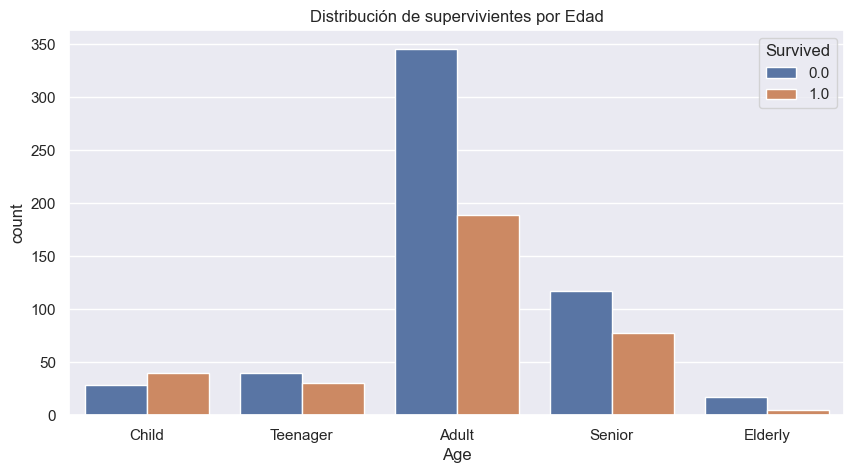

In [90]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Age", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

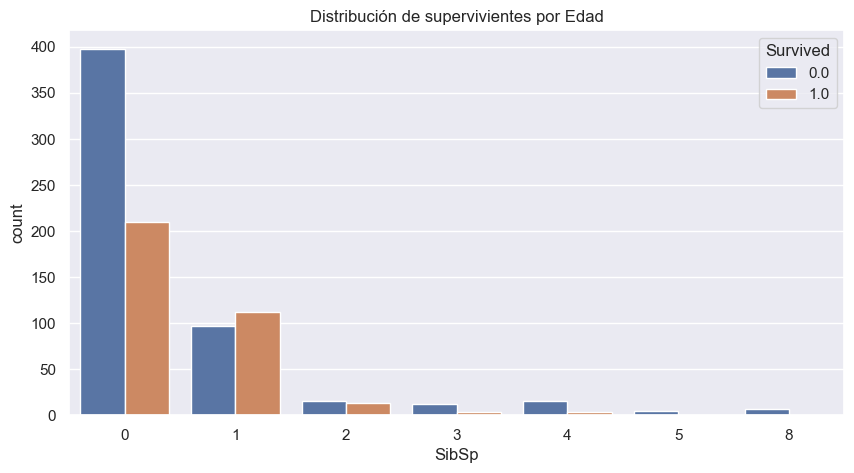

In [91]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "SibSp", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

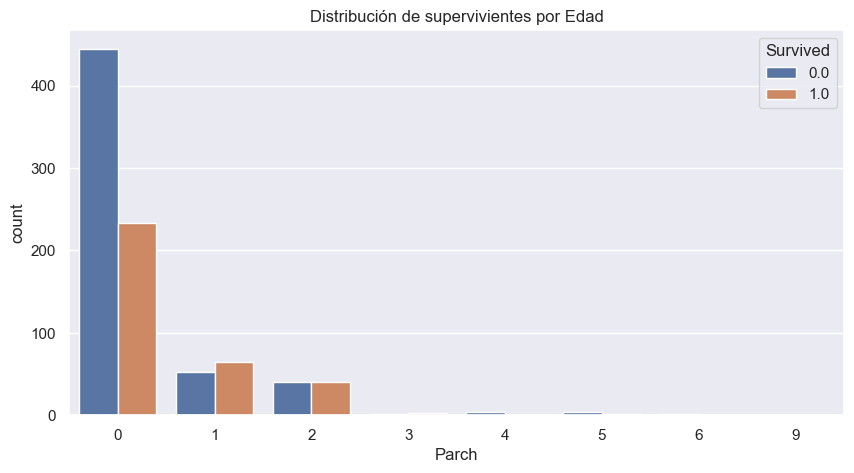

In [92]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Parch", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

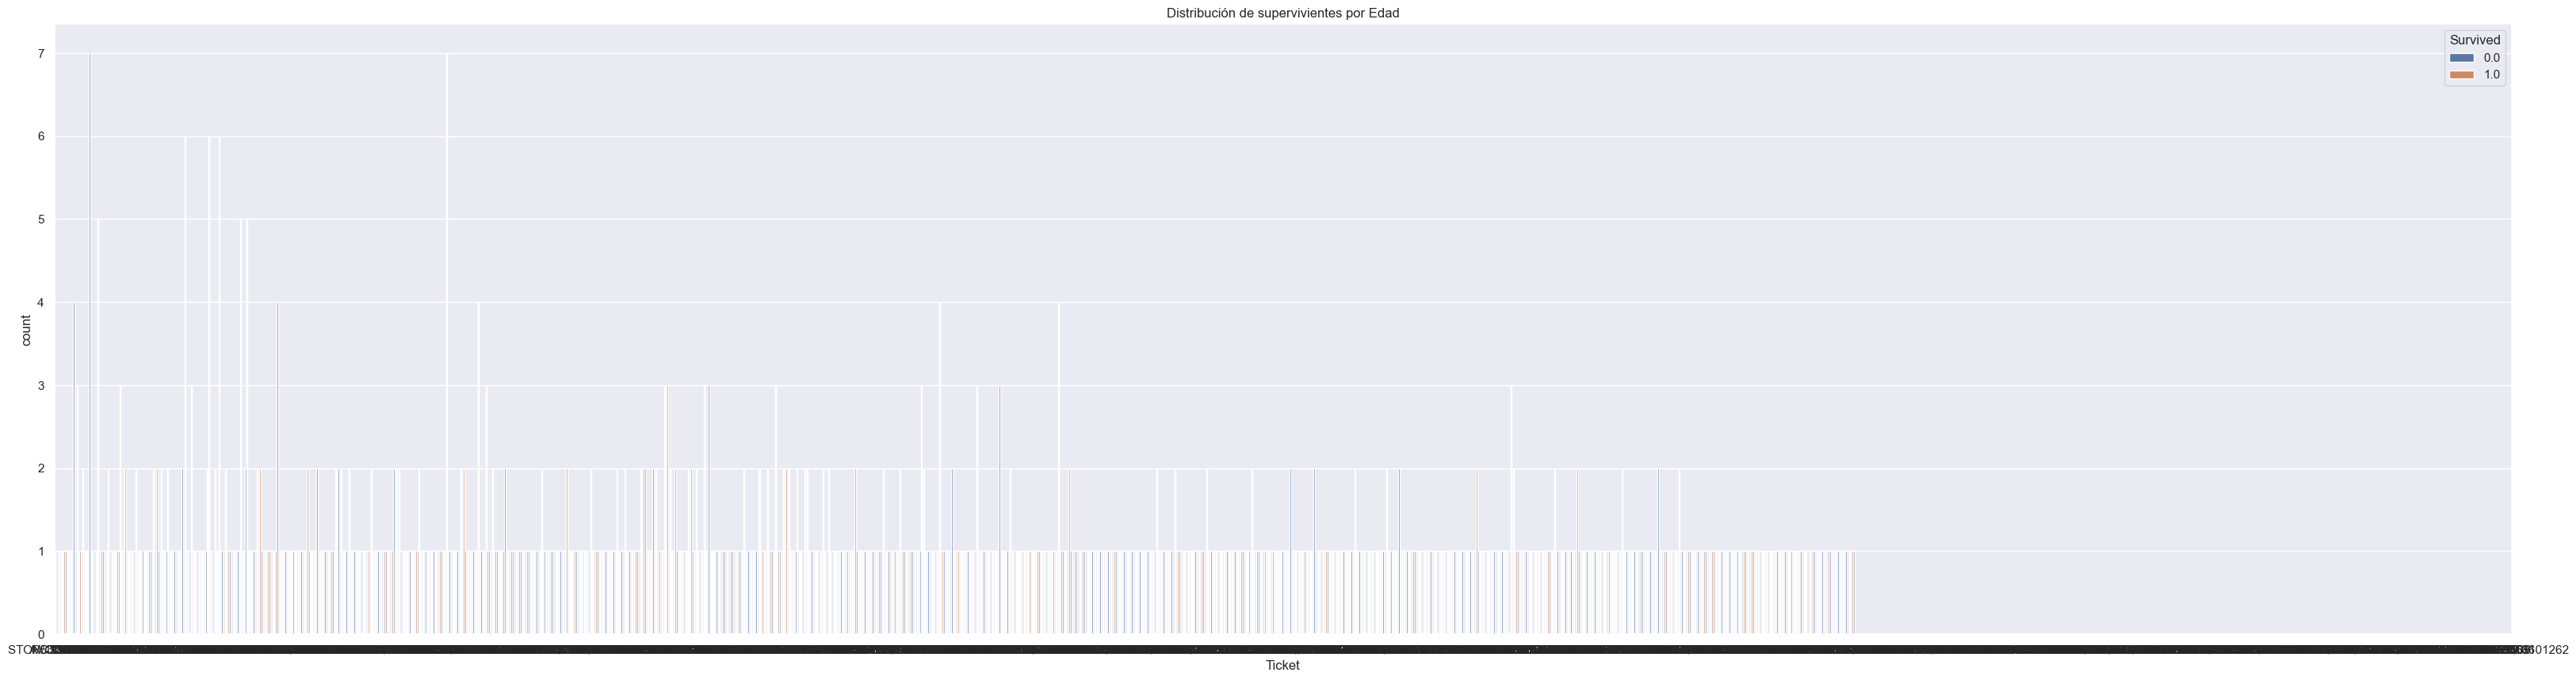

In [93]:
plt.figure(figsize=(40, 10))
sns.countplot(x = "Ticket", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

In [94]:
titanic_df['Ticket'].value_counts()

Ticket
CA. 2343            11
CA 2144              8
1601                 8
S.O.C. 14879         7
PC 17608             7
                    ..
A/5. 2151            1
350406               1
248706               1
STON/O2. 3101282     1
373450               1
Name: count, Length: 929, dtype: int64

In [95]:
titanic_df = titanic_df.drop(columns=['Ticket'], axis=1) #Elimino la columna Ticket
titanic_df.shape

(1309, 9)

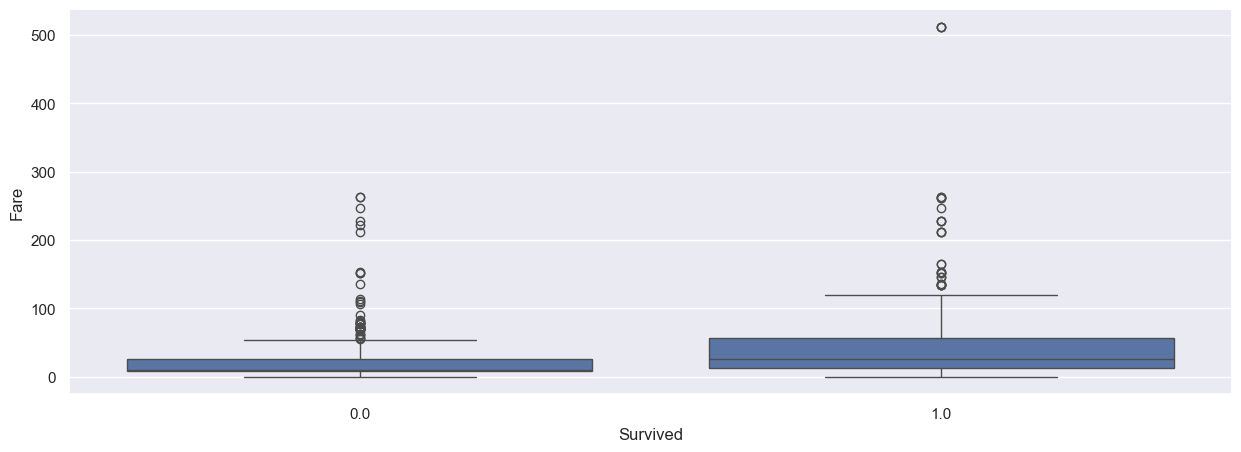

In [96]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Fare', x = 'Survived', data = titanic_df)
plt.show()

In [97]:
# Calcular el percentil 95 de la variable Page Views Per Visit
percentil_95 = titanic_df['Fare'].quantile(0.95)

# Calcular la mediana de la variable Page Views Per Visit (para reemplazar outliers)
mediana_Fare= titanic_df['Fare'].median()

# Reemplazar valores por encima del percentil 95 con la media
titanic_df['Fare'] = np.where(titanic_df['Fare'] > percentil_95, mediana_Fare, titanic_df['Fare'])

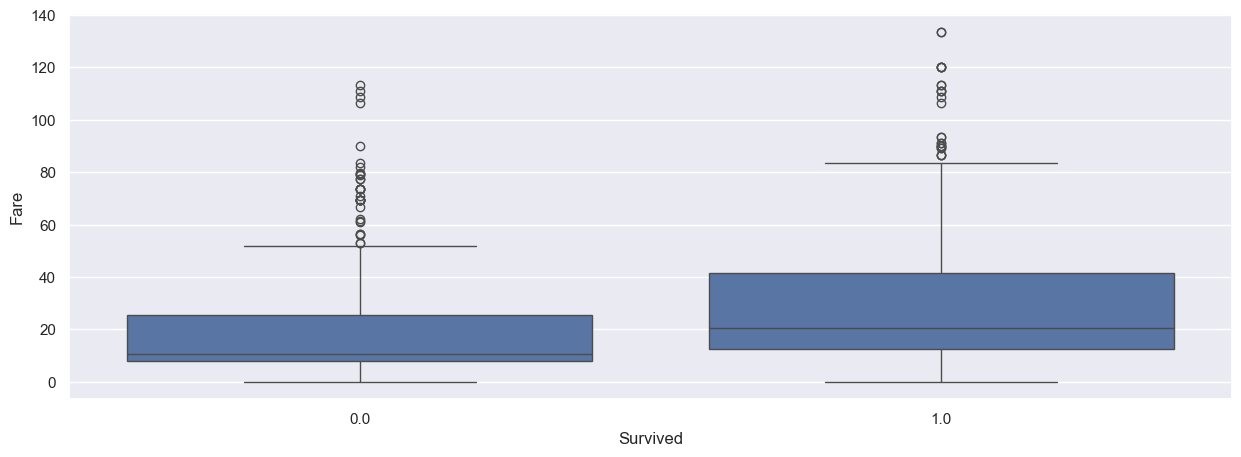

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Fare', x = 'Survived', data = titanic_df)
plt.show()

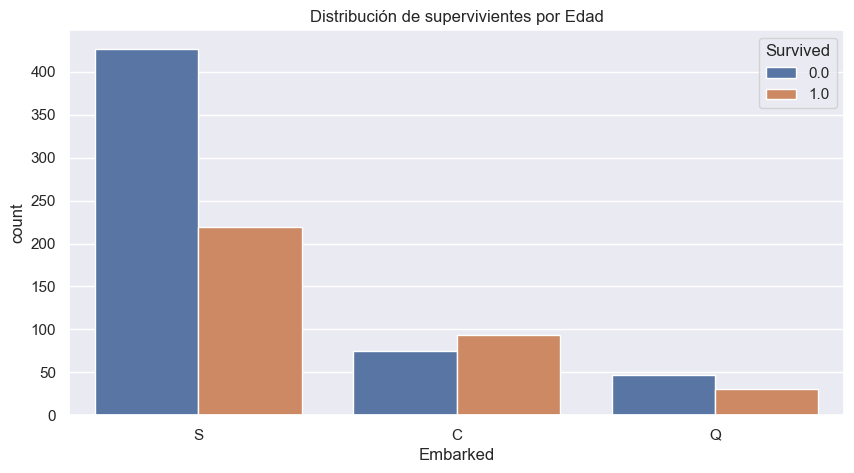

In [99]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Embarked", hue = "Survived", data = titanic_df)
plt.title("Distribución de supervivientes por Edad")
plt.show()

In [100]:
titanic_df.shape

(1309, 9)

In [101]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,Adult,1,0,7.2500,S
1,2,1.0,1,female,Senior,1,0,71.2833,C
2,3,1.0,3,female,Adult,0,0,7.9250,S
3,4,1.0,1,female,Adult,1,0,53.1000,S
4,5,0.0,3,male,Adult,0,0,8.0500,S


## Paso 4: Codificación de variables categóricas, estandarización y normalización

In [102]:
titanic_df.columns 

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Convertimos las variables de hombre y mujer a 0 y 1 siendo male = 0 y female = 1

In [103]:
# Vars binarias
varlist =  ['Sex']

# Funcion de mapeo
def binary_map(x):
    return x.map({'male': 0, "female": 1})

# aplicamos el mapeo
titanic_df[varlist] = titanic_df[varlist].apply(binary_map)


Convertimos las variables age en numeros para que lo entienda mejor le modelo


In [104]:
# Vars binarias
varlist =  ['Age']

# Funcion de mapeo
def binary_map(x):
    return x.map({'Child': 0, 'Teenager': 1, 'Adult': 2, 'Senior': 3, 'Elderly': 4})

# aplicamos el mapeo
titanic_df[varlist] = titanic_df[varlist].apply(binary_map)

Convertimos las variables Embarked en numeros para que lo entienda mejor le modelo

In [105]:
# Vars binarias
varlist =  ['Embarked']

# Funcion de mapeo
def binary_map(x):
    return x.map({'S': 0, 'C': 1, 'Q': 2})

# aplicamos el mapeo
titanic_df[varlist] = titanic_df[varlist].apply(binary_map)

In [106]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,2,1,0,7.2500,0
1,2,1.0,1,1,3,1,0,71.2833,1
2,3,1.0,3,1,2,0,0,7.9250,0
3,4,1.0,1,1,2,1,0,53.1000,0
4,5,0.0,3,0,2,0,0,8.0500,0



Ya tenemos todo en un idioma en el ordenador va a entender todo mejor

# Entrenamiento

## Paso 1: Train-Test Split

In [107]:
titanic_df.to_csv('titanic_df_clean.csv', index=False)

In [140]:
X = titanic_df.drop(['Survived', 'PassengerId'], axis=1)  # Eliminar la columna 'Survived' para obtener las características
y = titanic_df.notnull()['Survived']  # La columna 'Survived' es la variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [141]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1214,1,0,2,0,0,26.5500,0
677,3,1,1,0,0,9.8417,0
534,3,1,2,0,0,8.6625,0
1174,3,1,0,1,1,15.2458,1
864,2,0,2,0,0,13.0000,0


## Paso 2: Estandarización y Normalización

In [142]:
# Vamos a usar scikit learn StandardScaler
scaler = MinMaxScaler()

# Aplicamos el método a las columnas numéricas, esto hace que los valores estén acotados para evitar influencias de valores mayores sobre otros
X_train['Fare'] = scaler.fit_transform(X_train[['Fare']])
X_test['Fare'] = scaler.transform(X_test[['Fare']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1214,1,0,2,0,0,0.198653,0
677,3,1,1,0,0,0.073638,0
534,3,1,2,0,0,0.064815,0
1174,3,1,0,1,1,0.114073,1
864,2,0,2,0,0,0.097269,0


# Regresión Logística

In [143]:
X_train.shape,X_test.shape ,y_train.shape, y_test.shape

((916, 7), (393, 7), (916,), (393,))

In [144]:
from sklearn.linear_model import LogisticRegression 
# Entrenar el Modelo de Regresión Logística
# Crear una instancia del modelo de regresión logística
logistic_model = LogisticRegression(random_state=42, max_iter=10000)

# Entrenar el modelo con los datos de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar las métricas de evaluación
print(f"Exactitud del modelo: {accuracy}")

Exactitud del modelo: 0.6844783715012722


In [145]:
from sklearn.tree import DecisionTreeClassifier
# Árboles de decisión #1

# Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones
y_pred_dt = model.predict(X_test)
y_prob_dt = model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(accuracy_dt)

0.5521628498727735


In [146]:
from sklearn.svm import SVC

# Support Vector Machine #3

# Entrenar el modelo de SVM
svm_model = SVC(kernel="linear", probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)

accuracy_svm

0.6793893129770993